In [451]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in CSV Signal Data

In [452]:
csv_path = Path('trading_signals.csv')
df = pd.read_csv(csv_path, parse_dates=['time'], infer_datetime_format=True)
df.head()

,Unnamed: 0,time,open,high,low,close,volume,daily_return,fast_close,slow_close,...,volatility_trend_long,volatility_trend_short,volatility_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
0,0,2020-03-02,194.10,196.57,188.8500,196.54,21795546,0.000000,196.540000,196.540000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-03-03,196.22,197.24,183.9700,185.89,24693345,-0.054187,189.440000,190.846489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-03-04,189.05,191.83,186.3900,191.79,20486825,0.031739,190.782857,191.205456,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-03-05,186.78,188.99,183.8901,185.02,21975861,-0.035299,187.709333,189.324328,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-03-06,178.33,183.78,176.2600,181.11,21916170,-0.021133,184.303226,187.197647,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [453]:
df['time'].dtype

dtype('<M8[ns]')

### Set index, time and drop cols

In [454]:
df.set_index(pd.to_datetime(df['time'], infer_datetime_format=True), inplace=True)
df.drop(columns=['time'], inplace=True)
df.head()

,Unnamed: 0,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,...,volatility_trend_long,volatility_trend_short,volatility_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
time,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0,194.10,196.57,188.8500,196.54,21795546,0.000000,196.540000,196.540000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,1,196.22,197.24,183.9700,185.89,24693345,-0.054187,189.440000,190.846489,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,2,189.05,191.83,186.3900,191.79,20486825,0.031739,190.782857,191.205456,0.0,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05,3,186.78,188.99,183.8901,185.02,21975861,-0.035299,187.709333,189.324328,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-06,4,178.33,183.78,176.2600,181.11,21916170,-0.021133,184.303226,187.197647,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Set X-Vars and Filter to Obtain Associated Vals

In [455]:
x_var_list = ['macd_crossover_signal', 'rsi','rsi_signal', 'crossover_signal','bollinger_signal']
#x_var_list = ['rsi']
df[x_var_list].tail(10)

# import random
# random.choice([-40, 40])
# df['random'] = random.choice([1.0,-1.0])
# x_var_list = ['random']


,macd_crossover_signal,rsi,rsi_signal,crossover_signal,bollinger_signal
time,,,,,
2021-02-16,1.0,56.176960,1.0,1.0,0.0
2021-02-17,1.0,55.591397,1.0,1.0,0.0
2021-02-18,1.0,50.512832,1.0,1.0,0.0
2021-02-19,-1.0,42.606091,1.0,-1.0,0.0
2021-02-22,-1.0,41.447687,1.0,-1.0,0.0
2021-02-23,-1.0,47.984242,1.0,-1.0,0.0
2021-02-24,-1.0,46.449316,1.0,-1.0,0.0
2021-02-25,-1.0,38.099522,1.0,-1.0,1.0
2021-02-26,-1.0,41.184359,1.0,-1.0,0.0


In [456]:
#shift df index by 1
df[x_var_list] = df[x_var_list].shift(1)
df[x_var_list].tail(10)

,macd_crossover_signal,rsi,rsi_signal,crossover_signal,bollinger_signal
time,,,,,
2021-02-16,1.0,52.751101,1.0,1.0,0.0
2021-02-17,1.0,56.176960,1.0,1.0,0.0
2021-02-18,1.0,55.591397,1.0,1.0,0.0
2021-02-19,1.0,50.512832,1.0,1.0,0.0
2021-02-22,-1.0,42.606091,1.0,-1.0,0.0
2021-02-23,-1.0,41.447687,1.0,-1.0,0.0
2021-02-24,-1.0,47.984242,1.0,-1.0,0.0
2021-02-25,-1.0,46.449316,1.0,-1.0,0.0
2021-02-26,-1.0,38.099522,1.0,-1.0,1.0


### Drop NAs and Replace Pos/Neg Infiity

In [457]:
df.dropna(subset=x_var_list, inplace=True)
df.dropna(subset=['daily_return'], inplace=True)
df = df.replace([np.inf, -np.inf], np.nan)
df[x_var_list].head()

,macd_crossover_signal,rsi,rsi_signal,crossover_signal,bollinger_signal
time,,,,,
2020-03-03,0.0,0.0,0.0,0.0,0.0
2020-03-04,-1.0,0.0,0.0,-1.0,0.0
2020-03-05,-1.0,0.0,0.0,-1.0,0.0
2020-03-06,-1.0,0.0,0.0,-1.0,0.0
2020-03-09,-1.0,0.0,0.0,-1.0,0.0


In [458]:
df['Positive Return'] = np.where(df['daily_return'] > 0, 1.0, 0.0)
df[['daily_return','Positive Return']]

,daily_return,Positive Return
time,,
2020-03-03,-0.054187,0.0
2020-03-04,0.031739,1.0
2020-03-05,-0.035299,0.0
2020-03-06,-0.021133,0.0
2020-03-09,-0.069074,0.0
2020-03-10,0.056880,1.0
2020-03-11,-0.044728,0.0
2020-03-12,-0.092586,0.0
2020-03-13,0.104623,1.0


Assign Training and Testing Windows

In [459]:
# Construct training start and end dates
training_start = df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2020-08-14'

# Construct testing start and end dates
testing_start =  '2020-08-15'
testing_end = df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}") 

Training Start: 2020-03-03
Training End: 2020-08-14
Testing Start: 2020-08-15
Testing End: 2021-03-01


Separate X and y Training sets

In [460]:
df.head()

,Unnamed: 0,open,high,low,close,volume,daily_return,fast_close,slow_close,crossover_long,...,volatility_trend_short,volatility_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
time,,,,,,,,,,,,,,,,,,,,,
2020-03-03,1,196.22,197.24,183.9700,185.89,24693345,-0.054187,189.440000,190.846489,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,2,189.05,191.83,186.3900,191.79,20486825,0.031739,190.782857,191.205456,0.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-05,3,186.78,188.99,183.8901,185.02,21975861,-0.035299,187.709333,189.324328,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-06,4,178.33,183.78,176.2600,181.11,21916170,-0.021133,184.303226,187.197647,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,5,169.60,175.00,165.1900,168.60,26168734,-0.069074,176.326984,182.934588,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [461]:
df.index

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16',
               ...
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-03-01'],
              dtype='datetime64[ns]', name='time', length=251, freq=None)

In [462]:
X_train = df[x_var_list][training_start:training_end]
y_train = df['Positive Return'][training_start:training_end]

X_train.tail()

,macd_crossover_signal,rsi,rsi_signal,crossover_signal,bollinger_signal
time,,,,,
2020-08-10,1.0,71.334186,-1.0,1.0,-1.0
2020-08-11,1.0,65.310272,1.0,1.0,0.0
2020-08-12,1.0,58.630718,1.0,1.0,0.0
2020-08-13,1.0,60.946841,1.0,1.0,0.0
2020-08-14,1.0,61.864096,1.0,1.0,0.0


In [463]:
y_train.tail()

time
2020-08-10    0.0
2020-08-11    0.0
2020-08-12    1.0
2020-08-13    1.0
2020-08-14    0.0
Name: Positive Return, dtype: float64

In [464]:
X_test = df[x_var_list][testing_start:testing_end]
y_test = df['Positive Return'][testing_start:testing_end]

X_test.tail()

,macd_crossover_signal,rsi,rsi_signal,crossover_signal,bollinger_signal
time,,,,,
2021-02-23,-1.0,41.447687,1.0,-1.0,0.0
2021-02-24,-1.0,47.984242,1.0,-1.0,0.0
2021-02-25,-1.0,46.449316,1.0,-1.0,0.0
2021-02-26,-1.0,38.099522,1.0,-1.0,1.0
2021-03-01,-1.0,41.184359,1.0,-1.0,0.0


In [465]:
y_test.tail()

time
2021-02-23    1.0
2021-02-24    0.0
2021-02-25    0.0
2021-02-26    1.0
2021-03-01    1.0
Name: Positive Return, dtype: float64

### Setup Neural Networks

In [466]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [467]:
tf.random.set_seed(126)

In [468]:
X_scaler = StandardScaler()

In [469]:
#fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [470]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [471]:
X_train.shape

(116, 5)

In [472]:
#define the model
number_inputs = 5
number_hidden_nodes = 15

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

In [473]:
#compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [474]:
model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5284
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4778
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.5423
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5640
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5918
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6226
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5841
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5719
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.6021
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5959
Epoch 11/100
4/4 [===========

<AxesSubplot:>

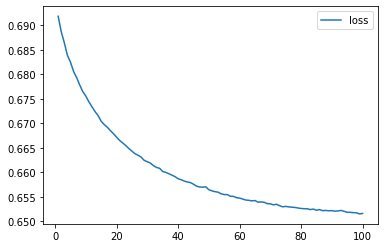

In [475]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

<AxesSubplot:>

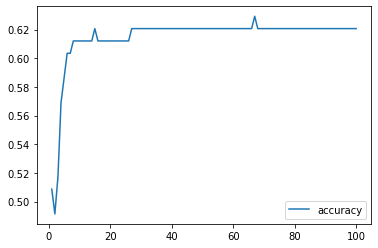

In [476]:
# Plot the accuracy
df_plot.plot(y="accuracy")

In [477]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}") 

5/5 - 0s - loss: 0.7578 - accuracy: 0.5037
Loss: 0.7578108310699463, Accuracy: 0.5037037134170532


In [478]:
predicted = nn.predict(X_test)

In [479]:
results_nn = pd.DataFrame({'Actual': y_test,
              'Predicted':predicted.ravel()
             })

results_nn['Predicted'] = results_nn['Predicted'].apply(lambda x : 1 if x > .5 else 0)
results_nn

,Actual,Predicted
time,,
2020-08-17,0.0,1
2020-08-18,1.0,1
2020-08-19,1.0,1
2020-08-20,1.0,1
2020-08-21,0.0,1
2020-08-24,1.0,1
2020-08-25,1.0,1
2020-08-26,1.0,1
2020-08-27,0.0,0


In [480]:
#results_nn['Predicted'] = results_nn['Predicted'].apply(lambda x: -1 if x == 0)


In [481]:
results_nn['Return'] = df['daily_return']

In [482]:
results_nn

,Actual,Predicted,Return
time,,,
2020-08-17,0.0,1,-0.000038
2020-08-18,1.0,1,0.004211
2020-08-19,1.0,1,0.001487
2020-08-20,1.0,1,0.023942
2020-08-21,0.0,1,-0.007435
2020-08-24,1.0,1,0.016554
2020-08-25,1.0,1,0.034595
2020-08-26,1.0,1,0.082223
2020-08-27,0.0,0,-0.035339


In [483]:
results_nn['Predicted'].replace(0, -1, inplace=True)
results_nn

,Actual,Predicted,Return
time,,,
2020-08-17,0.0,1,-0.000038
2020-08-18,1.0,1,0.004211
2020-08-19,1.0,1,0.001487
2020-08-20,1.0,1,0.023942
2020-08-21,0.0,1,-0.007435
2020-08-24,1.0,1,0.016554
2020-08-25,1.0,1,0.034595
2020-08-26,1.0,1,0.082223
2020-08-27,0.0,-1,-0.035339


<AxesSubplot:xlabel='time'>

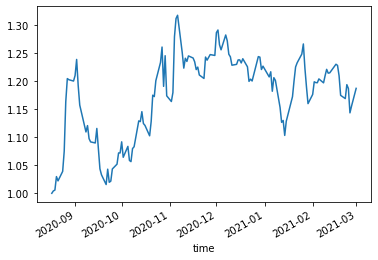

In [484]:
(1 + results_nn['Return'] * results_nn['Predicted']).cumprod().plot()

<AxesSubplot:xlabel='time'>

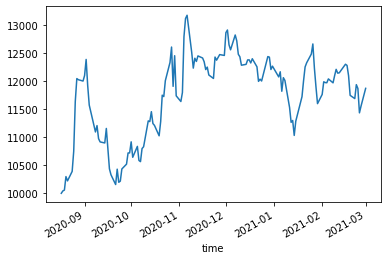

In [485]:
initial_capital = 10000

cumulative_return_capital_nn = initial_capital * (1 + (results_nn['Return'] * results_nn['Predicted'])).cumprod()
cumulative_return_capital_nn.plot()

In [486]:
import os
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object\n",
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

# Format current date as ISO format
today = pd.Timestamp("2021-03-01", tz="America/New_York").isoformat()
start = pd.Timestamp("2020-03-01", tz="America/New_York").isoformat()

# today = date.today()
# start = today - timedelta(days=180)
# today = pd.Timestamp(today, tz="America/New_York").isoformat()
# start = pd.Timestamp(start, tz="America/New_York").isoformat()

print(f"Today = {today} and Start = {start}")

# Set the tickers\n",
tickers = ["SPY"]

#timeframe
timeframe = "1D"

# Get current price data for MSFT and AAPL
df_sp500 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = today,
    limit=1000
).df

# Display data
df_sp500.columns = df_sp500.columns.get_level_values(1)
df_sp500.reset_index(inplace=True)
#df_sp500.head()

Today = 2021-03-01T00:00:00-05:00 and Start = 2020-03-01T00:00:00-05:00


In [487]:
df_sp500['time'] = df_sp500['time'].dt.date
df_sp500.set_index('time',inplace=True)

In [488]:
df_sp500.index = pd.to_datetime(df_sp500.index)


In [489]:
df_sp500.index.dtype

dtype('<M8[ns]')

In [490]:
#df['daily_return'] = df['close'].dropna().pct_change()
#(1 + daily_returns['SOROS FUND MANAGEMENT LLC']).cumprod()

In [491]:
cumulative_ret = cumulative_return_capital_nn.to_frame()
cumulative_ret.head()
cumulative_ret.index.dtype

dtype('<M8[ns]')

In [492]:
# cumulative_ret.reset_index(inplace=True)
# cumulative_ret['time'] = cumulative_ret.dt.date
# cumulative_ret.set_index('time', inplace=True)
# cumulative_ret.head()

In [493]:
together = pd.concat([df_sp500,cumulative_ret],axis=1)
together

,open,high,low,close,volume,0
time,,,,,,
2020-03-02,298.2100,309.1600,294.4600,309.0800,205636837,NaN
2020-03-03,309.5000,313.8400,297.5700,300.3400,271529926,NaN
2020-03-04,306.1200,313.1000,303.3300,312.9100,147338447,NaN
2020-03-05,304.9800,308.4700,300.0100,302.4500,159971245,NaN
2020-03-06,293.1500,298.7800,290.2300,297.4200,198657535,NaN
2020-03-09,275.3000,284.1900,273.4500,274.4000,277300725,NaN
2020-03-10,284.6400,288.5200,273.5000,288.4400,246644123,NaN
2020-03-11,280.7000,281.9400,270.8800,274.3600,231055382,NaN
2020-03-12,256.0000,266.6600,247.6800,248.1000,346670590,NaN


In [494]:
#settings
pd.set_option('display.max_rows', None)
together = together.loc["2020-08-17":]
together['daily_return'] = together['close'].dropna().pct_change()
together['cumulative_return'] = (1 + together['daily_return']).cumprod() * 10000

together = together.rename(columns = {"cumulative_return":"SP500", 0:"Algo"})
together.head()

,open,high,low,close,volume,Algo,daily_return,SP500
time,,,,,,,,
2020-08-17,337.94,338.34,336.8517,337.88,56151840,9999.617210,NaN,NaN
2020-08-18,338.34,339.10,336.6100,338.62,66539876,10041.724085,0.002190,10021.901267
2020-08-19,339.05,339.61,336.6200,337.22,115453214,10056.652886,-0.004134,9980.466438
2020-08-20,335.36,338.80,335.2200,338.25,71552086,10297.427653,0.003054,10010.950633
2020-08-21,337.92,339.72,337.5500,339.44,85164214,10220.869698,0.003518,10046.170238


In [495]:
#results_nn.loc['2020-10-01':'2020-11-01']

<AxesSubplot:xlabel='time'>

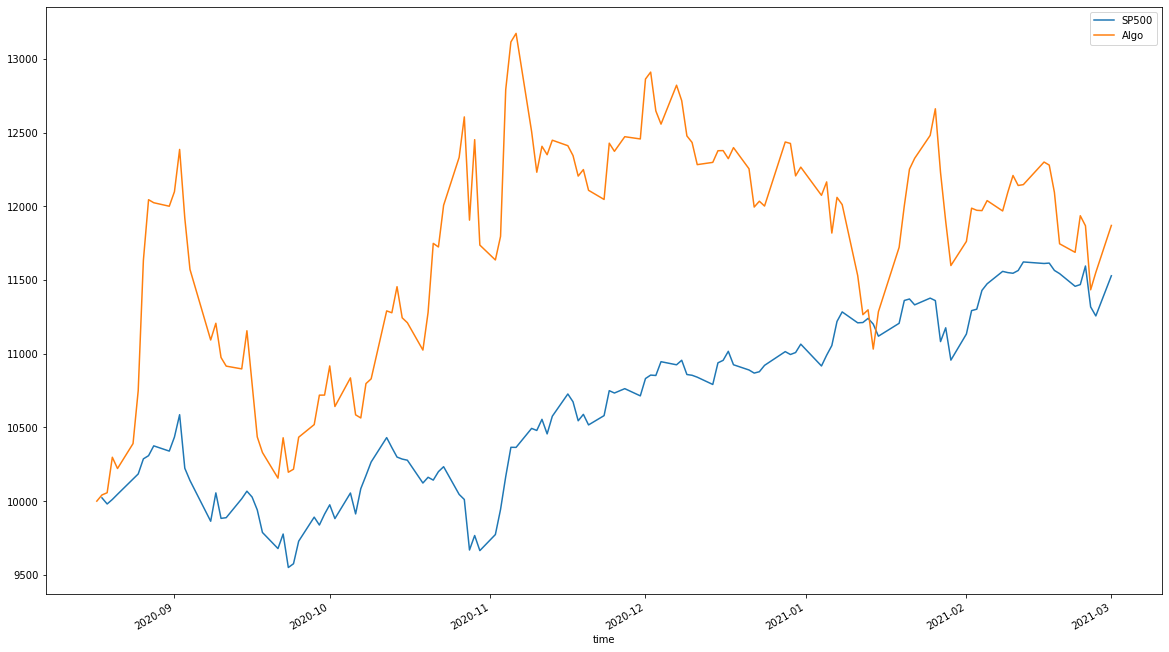

In [496]:
together[["SP500","Algo"]].plot(figsize=(20,12))

## Train with Random Forest Model

In [497]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification 

In [498]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions_rf = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results_rf = y_test.to_frame()
results_rf["Predicted"] = predictions
results_rf['Return'] = df['daily_return']
results_rf

NameError: name 'predictions' is not defined

### Show Cumulative Returns with Random Forest Model

In [ ]:
(1 + results_rf['Return'] * results_rf['Predicted']).cumprod().plot()

Calculate and Assign Porfolio Evaluation Metrics

In [ ]:
df.head()

In [ ]:
capture = pd.DataFrame({
        'close': df['close'],
        'volume': df['volume'],
        'open':df['open'],
        'high':df['high'],
        'low':df['low'],
        'Positive Return': results_rf['Positive Return'],
        'Predicted': results_rf['Predicted'],
        'Return': results_rf['Return']
})

#Positive Return	Predicted	Return
capture

# pd.DataFrame({'Actual': y_test,
#               'Predicted':predicted.ravel()
#              })
